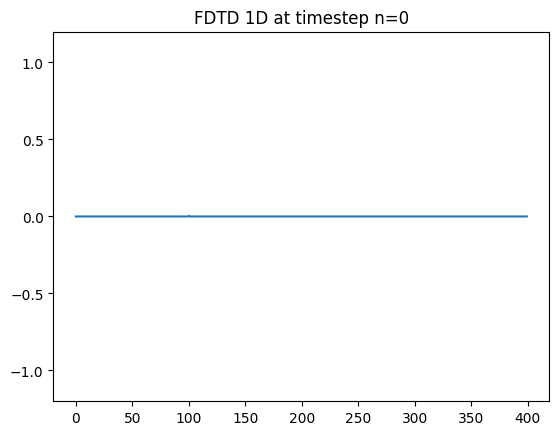

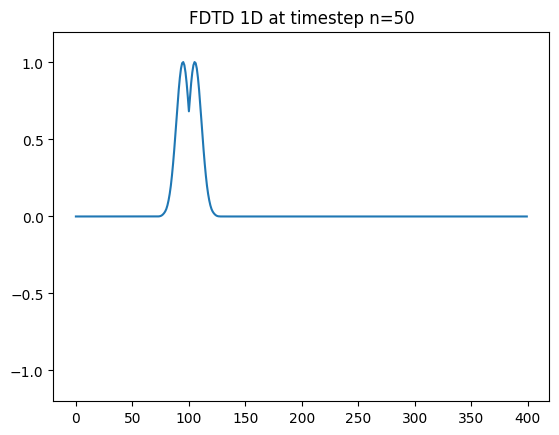

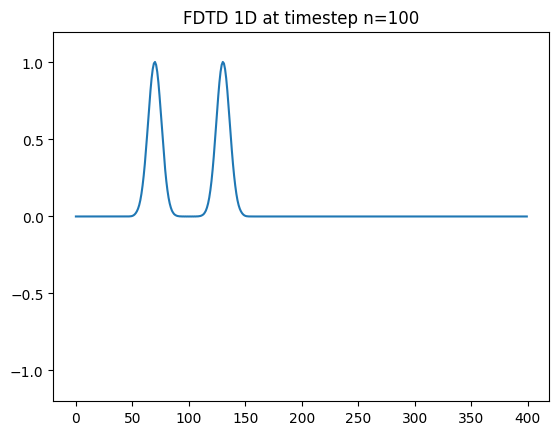

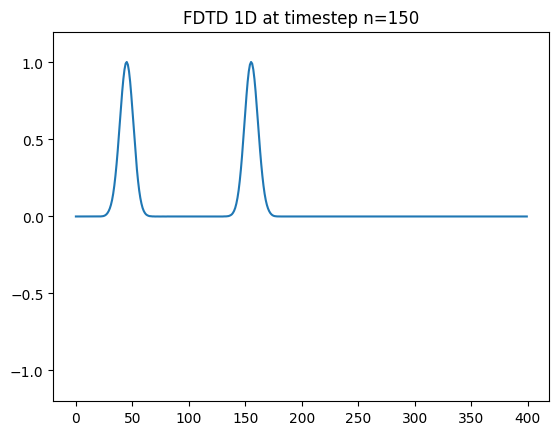

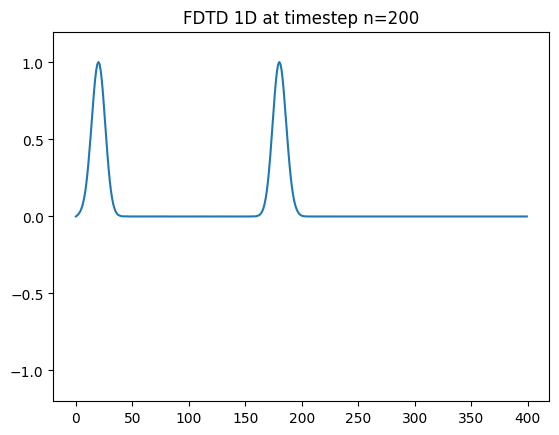

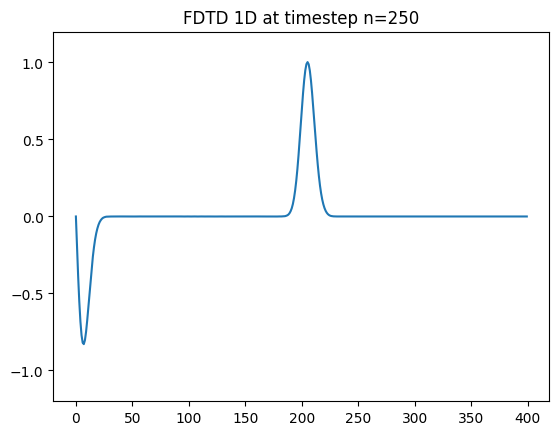

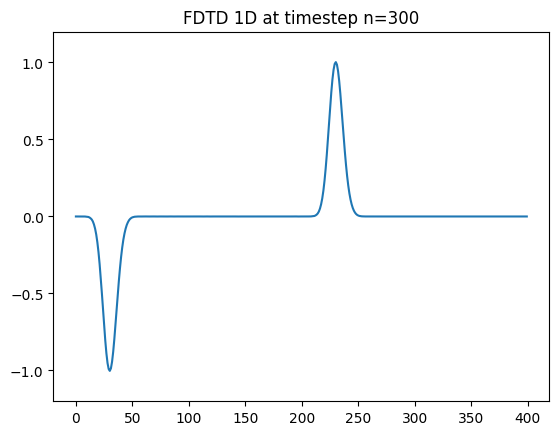

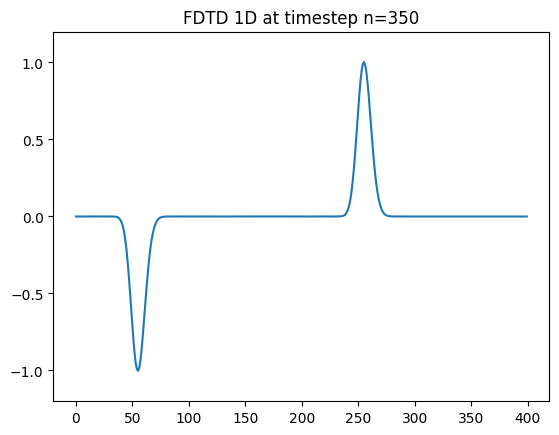

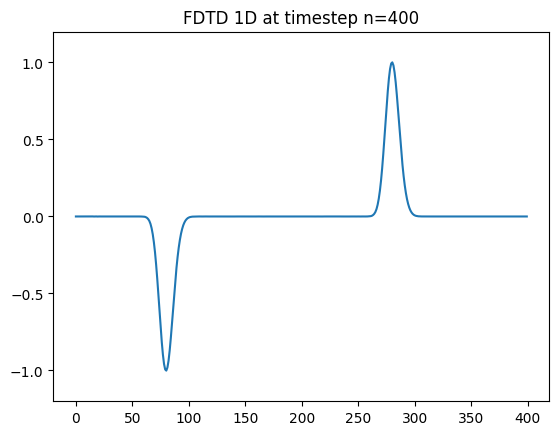

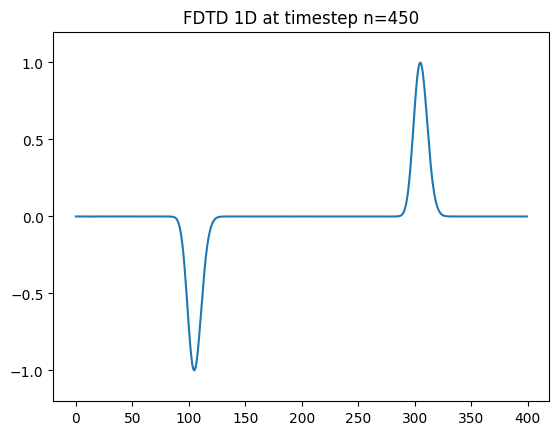

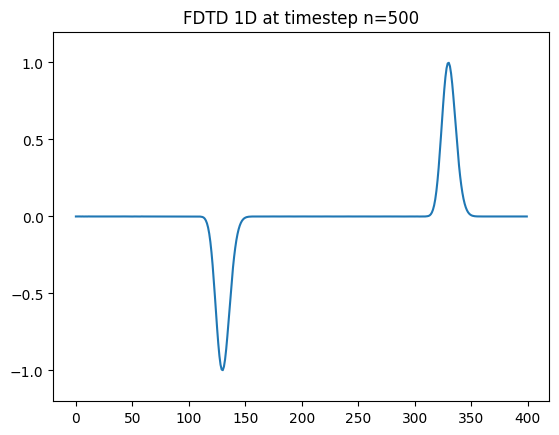

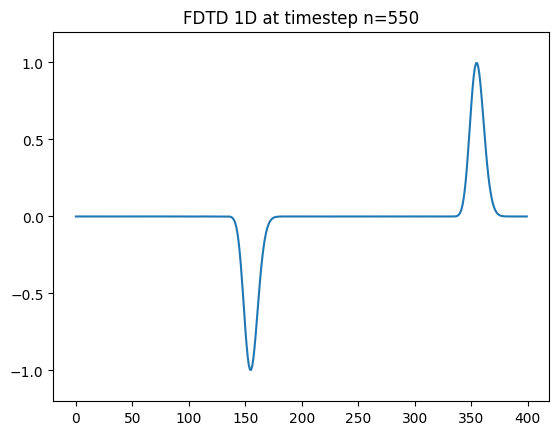

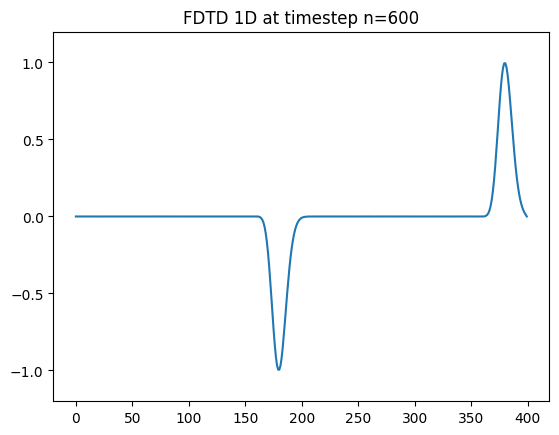

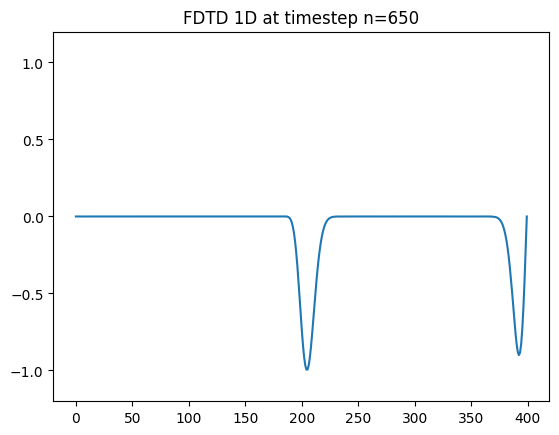

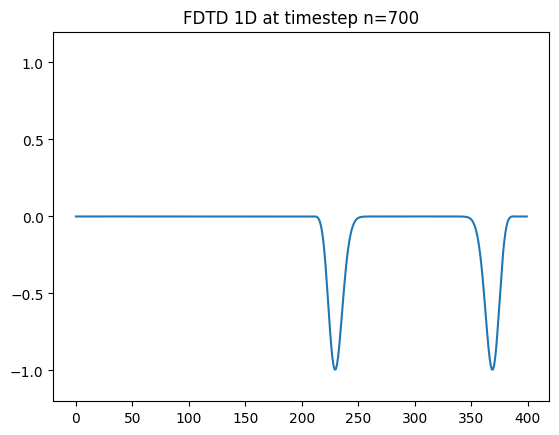

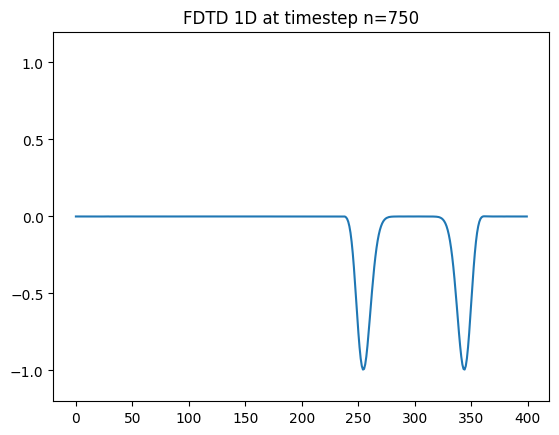

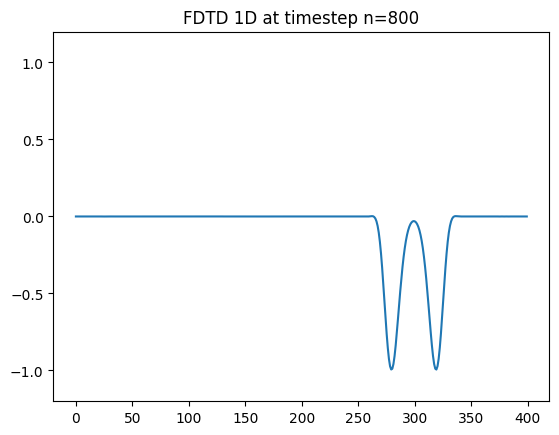

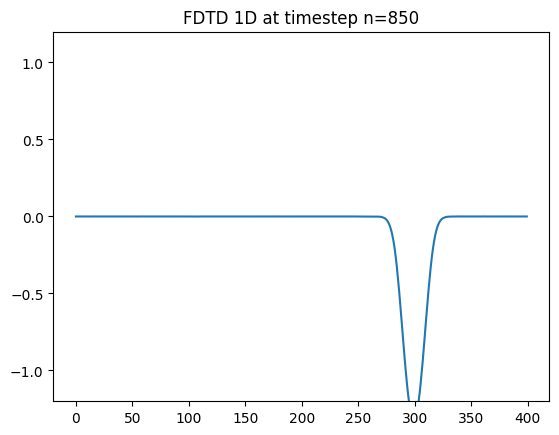

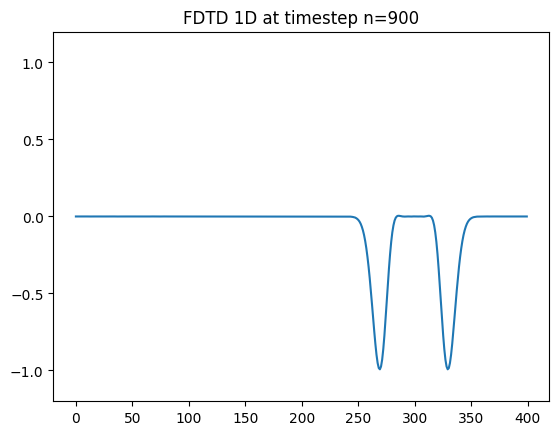

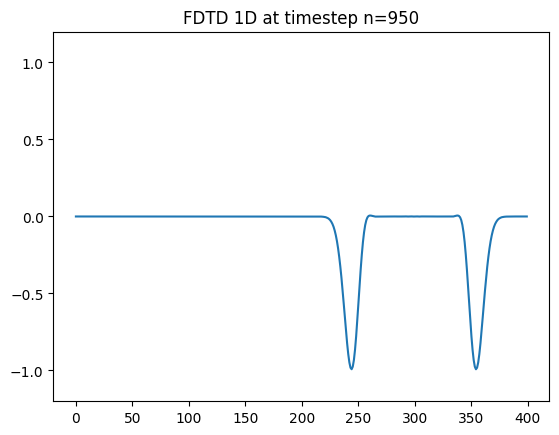

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Physical constants
eps0 = 8.854e-12
mu0  = 4e-7 * np.pi
c0   = 1 / np.sqrt(eps0 * mu0)

# Domain parameters
Nx = 400
dx = 1e-3
dt = dx / (2 * c0)  # CFL stability condition
Nt = 1000

# Field initialization
Ez = np.zeros(Nx) # Electric field
Hy = np.zeros(Nx) # Magnetic field

source = Nx // 4 # Source position

# Simulation Loop
for n in range(Nt):
    # Update H
    for i in range(Nx - 1):
        Hy[i] = Hy[i]+ (dt / (mu0 * dx)) * (Ez[i + 1] - Ez[i])

    # Gaussian excitation
    t0 = 40
    spread = 12
    Ez[source] =Ez[source]+ np.exp(-0.5 * ((n - t0) / spread)**2)

    # Update E
    for i in range(1, Nx):
        Ez[i] = Ez[i] +(dt / (eps0 * dx)) * (Hy[i] - Hy[i - 1])

    # Left and right PEC boundaries
    Ez[0] = 0
    Ez[-1] = 0

    # Dynamic plot
    if n % 50 == 0:
        plt.clf()
        plt.plot(Ez)
        plt.ylim(-1.2, 1.2)
        plt.title(f"FDTD 1D at timestep n={n}")
        plt.pause(0.01)

plt.show()